In [27]:
import numpy as np
import pandas as pd

In [28]:
loan_data_inputs_train=pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train=pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test=pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test=pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [29]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,annual_inc:80000-90000,annual_inc:90000-100000,annual_inc:100000-120000,annual_inc:120000-140000,annual_inc:>140000,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,0,0,1,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,1,0,0,0,0,1,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,1,0,0,0,0,0,0,0,1,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,0,0,0,0,1,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,0,0,1,0,0,0,0


In [30]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


### Selecting the Features

In [37]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'annual_inc:<20',
'annual_inc:20000-30000',
'annual_inc:30000-40000',
'annual_inc:40000-50000',
'annual_inc:50000-60000',
'annual_inc:60000-70000',
'annual_inc:70000-80000',
'annual_inc:80000-90000',
'annual_inc:90000-100000',
'annual_inc:100000-120000',
'annual_inc:120000-140000',
'annual_inc:>140000',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57'
]]

# take out the bench mark dummy variables
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'emp_length:0',
'int_rate:>20.281',
'annual_inc:<20',
'mths_since_last_delinq:Missing',
]

In [39]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,annual_inc:70000-80000,annual_inc:80000-90000,annual_inc:90000-100000,annual_inc:100000-120000,annual_inc:120000-140000,annual_inc:>140000,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
206088,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
136020,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36159,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
reg = LogisticRegression()

In [42]:
pd.options.display.max_rows = None

In [43]:
reg.fit(inputs_train,loan_data_targets_train)

C:\Users\K\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [44]:
reg.intercept_

array([0.44977893])

In [45]:
reg.coef_

array([[ 6.27984775e-01,  7.52498351e-01,  6.77062720e-01,
         5.97839871e-01,  4.27334030e-01,  1.76335629e-01,
         1.04790523e-01,  1.40931246e-01, -5.07318843e-02,
        -4.17066310e-03,  1.33391082e-03,  5.96867496e-02,
         4.28854531e-02,  1.14947198e-01,  1.57556020e-01,
         1.74026041e-01,  2.49195175e-01,  4.27636762e-01,
         6.86396645e-02,  9.27532018e-02,  2.96649788e-02,
         5.86469207e-02,  1.39669359e-01,  1.63699749e+00,
         9.12913048e-01,  5.56079541e-01,  1.63025724e-01,
        -5.34293456e-02,  6.13821125e-03,  9.46204858e-02,
         1.56392960e-01,  2.38152106e-01,  3.12279726e-01,
         3.88208537e-01,  4.19673121e-01,  5.03936161e-01,
         6.08673098e-01,  5.65342693e-01,  7.42797370e-02,
         1.08561000e-01,  1.32582655e-01,  9.15395684e-02]])

In [50]:
feature_name = inputs_train.columns.values

In [51]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns =  ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,0.449779
1,grade:A,0.627985
2,grade:B,0.752498
3,grade:C,0.677063
4,grade:D,0.597840
5,grade:E,0.427334
6,grade:F,0.176336
7,home_ownership:MORTGAGE,0.104791
8,home_ownership:OWN,0.140931
9,addr_state:NM_VA,-0.050732


### Build a Logistic Regression Model with P-values

In [52]:
from sklearn import linear_model
import scipy.stats as stat

In [53]:
class LogisticRegression_with_p_values:
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
    
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [54]:
reg = LogisticRegression_with_p_values()

In [55]:
reg.fit(inputs_train,loan_data_targets_train)

C:\Users\K\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [56]:
summary_table = pd.DataFrame(columns =  ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,0.449779
1,grade:A,0.627985
2,grade:B,0.752498
3,grade:C,0.677063
4,grade:D,0.597840
5,grade:E,0.427334
6,grade:F,0.176336
7,home_ownership:MORTGAGE,0.104791
8,home_ownership:OWN,0.140931
9,addr_state:NM_VA,-0.050732


In [60]:
p_values = reg.p_values
p_values = np.append(np.nan,np.array(p_values))

summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,0.449779,NaN
1,grade:A,0.627985,4.612373e-15
2,grade:B,0.752498,2.741811e-57
3,grade:C,0.677063,1.083452e-54
4,grade:D,0.597840,4.001493e-48
5,grade:E,0.427334,1.300839e-35
6,grade:F,0.176336,1.754434e-06
7,home_ownership:MORTGAGE,0.104791,3.183053e-18
8,home_ownership:OWN,0.140931,8.943616e-13
9,addr_state:NM_VA,-0.050732,7.654034e-02


In [ ]:
# drop variables with p values > 0.05

In [61]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'annual_inc:<20',
'annual_inc:20000-30000',
'annual_inc:30000-40000',
'annual_inc:40000-50000',
'annual_inc:50000-60000',
'annual_inc:60000-70000',
'annual_inc:70000-80000',
'annual_inc:80000-90000',
'annual_inc:90000-100000',
'annual_inc:100000-120000',
'annual_inc:120000-140000',
'annual_inc:>140000',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57'
]]

# take out the bench mark dummy variables
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'emp_length:0',
'int_rate:>20.281',
'annual_inc:<20',
'mths_since_last_delinq:Missing',
]

In [62]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,annual_inc:70000-80000,annual_inc:80000-90000,annual_inc:90000-100000,annual_inc:100000-120000,annual_inc:120000-140000,annual_inc:>140000,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
206088,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
136020,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36159,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train,loan_data_targets_train)

C:\Users\K\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [64]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns =  ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,0.449779
1,grade:A,0.627985
2,grade:B,0.752498
3,grade:C,0.677063
4,grade:D,0.597840
5,grade:E,0.427334
6,grade:F,0.176336
7,home_ownership:MORTGAGE,0.104791
8,home_ownership:OWN,0.140931
9,addr_state:NM_VA,-0.050732


In [65]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))

summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,0.449779,NaN
1,grade:A,0.627985,4.612373e-15
2,grade:B,0.752498,2.741811e-57
3,grade:C,0.677063,1.083452e-54
4,grade:D,0.597840,4.001493e-48
5,grade:E,0.427334,1.300839e-35
6,grade:F,0.176336,1.754434e-06
7,home_ownership:MORTGAGE,0.104791,3.183053e-18
8,home_ownership:OWN,0.140931,8.943616e-13
9,addr_state:NM_VA,-0.050732,7.654034e-02


### PD Model Validation (Test) validation

In [66]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'annual_inc:<20',
'annual_inc:20000-30000',
'annual_inc:30000-40000',
'annual_inc:40000-50000',
'annual_inc:50000-60000',
'annual_inc:60000-70000',
'annual_inc:70000-80000',
'annual_inc:80000-90000',
'annual_inc:90000-100000',
'annual_inc:100000-120000',
'annual_inc:120000-140000',
'annual_inc:>140000',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57']]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'emp_length:0',
'int_rate:>20.281',
'annual_inc:<20',
'mths_since_last_delinq:Missing',
]

In [68]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories,axis = 1)


In [69]:
y_hat_test = reg2.model.predict(inputs_test)

In [70]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [71]:
# select the cutoff
y_hat_test_prob = reg2.model.predict_proba(inputs_test)

In [72]:
y_hat_test_prob
# prob of default ,   prob of non-default

array([[0.11651402, 0.88348598],
       [0.19858989, 0.80141011],
       [0.07205046, 0.92794954],
       ...,
       [0.03007639, 0.96992361],
       [0.04582901, 0.95417099],
       [0.03932699, 0.96067301]])

In [78]:
y_hat_test_prob[:][:,1]

array([0.88348598, 0.80141011, 0.92794954, ..., 0.96992361, 0.95417099,
       0.96067301])

In [79]:
y_hat_test_prob = y_hat_test_prob[:][:,1]

In [80]:
y_hat_test_prob

array([0.88348598, 0.80141011, 0.92794954, ..., 0.96992361, 0.95417099,
       0.96067301])

In [82]:
loan_data_targets_test_temp = loan_data_targets_test

In [83]:
loan_data_targets_test_temp.reset_index(drop=True,inplace=True)

In [85]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_prob)],axis = 1)


In [86]:
df_actual_predicted_probs.shape

(93257, 2)

In [100]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_prob']

In [101]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [102]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_prob
362514,1,0.883486
288564,1,0.801410
213591,1,0.927950
263083,1,0.898284
165001,1,0.971796


### Accuracy and Acrea Under the Curve

In [115]:
tr = 0.9

df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_prob']>tr,1,0)

In [116]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_prob,y_hat_test
362514,1,0.883486,0
288564,1,0.801410,0
213591,1,0.927950,1
263083,1,0.898284,0
165001,1,0.971796,1


In [117]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

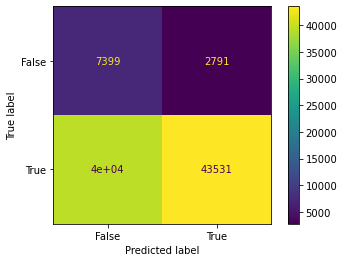

In [118]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = df_actual_predicted_probs['loan_data_targets_test']
predicted = df_actual_predicted_probs['y_hat_test']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [120]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7399,2791
1,39536,43531


In [119]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],colnames = ['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079340,0.029928
1,0.423947,0.466785


In [121]:
from sklearn.metrics import roc_curve, roc_auc_score

In [134]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],pos_label = 1)

(array([0.        , 0.27389598, 1.        ]),
 array([0.        , 0.52404685, 1.        ]),
 array([2, 1, 0]))

In [124]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                               df_actual_predicted_probs['y_hat_test'])

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC Curve')

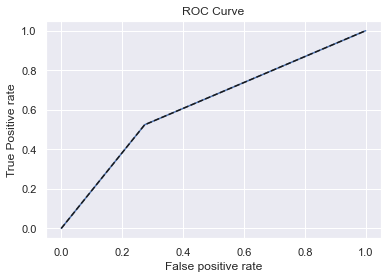

In [126]:
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,linestyle = '--',color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')

In [ ]:
# AUC measure how good a classification model is 

In [135]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],
                               df_actual_predicted_probs['y_hat_test'])
AUROC # Fair %70-%80

# Gini and K-S

0.6250754386485351

# LGD EAD

In [ ]:
# LGD = % of exposure not recovered
# recovery rate = % of exposure recovered
#LGD = 1 - recovery rate

# EAD = total exposure at default

In [ ]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']

In [ ]:
loan_data_defaults['CCF'] = loan_data_defaults['total_rec_prncp']/loan_data_defaults['funded_amnt']